In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.stats import kruskal
from scipy.stats import gaussian_kde

import sys
import os

sys.path.append(os.path.relpath("../../huygens"))
sys.path.append(os.path.relpath("../../galileo"))

import galileo as gal
import huygens as huy

plt.rcParams['ps.useafm'] = True
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Transcripts to genes

In [6]:
t2g = pd.read_csv("../data/intermediate/sleuth_diff/ensembl_t2g.csv")
t2g["format_gene_id"] = t2g["hgnc_gene"].fillna("") + "_" + t2g["ens_gene"]

format_gene_map = dict(zip(t2g["ens_gene"],t2g["format_gene_id"]))

# Manifest

In [36]:
gtex_manifest_1 = pd.read_csv("../../data/raw/gtex/E-MTAB-5214.sdrf.txt", sep="\t")
gtex_manifest_2 = pd.read_csv("../../data/raw/gtex/E-MTAB-2919.sdrf.txt", sep="\t")

gtex_manifest = pd.concat([
    gtex_manifest_1,
    gtex_manifest_2
], 
    axis=0, sort=True)

gtex_manifest = gtex_manifest.drop_duplicates(subset=["Source Name"])
gtex_manifest = gtex_manifest.dropna(subset=["Comment[histological type]"],axis=0)
gtex_manifest = gtex_manifest.set_index("Source Name")
gtex_manifest["tissue"] = gtex_manifest["Comment[histological type]"]

# Preprocess GTEx

In [11]:
gtex_genex = pd.read_hdf("../../data/processed/gtex/gtex_genex.hdf",key="gtex_genex")
gtex_a3ss = pd.read_hdf("../../data/processed/gtex/gtex_a3ss.hdf",key="gtex_a3ss")
gtex_se = pd.read_hdf("../../data/processed/gtex/gtex_se.hdf",key="gtex_se")

In [12]:
gtex_a3ss.columns = [format_gene_map.get(x.split(".")[0],"unnamed")+"_"+x for x in gtex_a3ss.columns]
gtex_se.columns = [format_gene_map.get(x.split(".")[0],"unnamed")+"_"+x for x in gtex_se.columns]

# Splicing and expression

In [13]:
mdm4_6 = gtex_se["MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"]
rpl22l1_3a = gtex_a3ss["RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"]

mdm4 = gtex_genex["MDM4_ENSG00000198625.12"]
rpl22l1 = gtex_genex["RPL22L1_ENSG00000163584.17"]
rpl22 = gtex_genex["RPL22_ENSG00000116251.9"]




In [48]:
res = gal.mat_corrs_naive(mdm4_6,gtex_genex,pbar=True)

In [49]:
res

,corr,n,pval,qval
RP13-554M15.7_ENSG00000280287.1,-0.415825,2363.0,98.733609,93.989035
RP11-98F14.12_ENSG00000283828.1,-0.368446,2363.0,76.150851,71.707307
PCDHGB8P_ENSG00000248449.2,-0.362973,2363.0,73.775357,69.507904
RP11-439C8.1_ENSG00000243969.1,-0.340107,2363.0,64.341046,60.198531
PCDHGB9P_ENSG00000276545.1,-0.331268,2363.0,60.900890,56.855285
PHBP13_ENSG00000234835.1,-0.329429,2363.0,60.199276,56.232853
RP13-143G15.4_ENSG00000237596.6,-0.327411,2363.0,59.434901,55.535425
LA16c-329F2.2_ENSG00000275092.1,-0.322246,2363.0,57.504669,53.663184
RP11-255C15.3_ENSG00000260743.1,-0.319652,2363.0,56.549517,52.759185
LUADT1_ENSG00000196634.3,-0.314997,2363.0,54.859082,51.114507


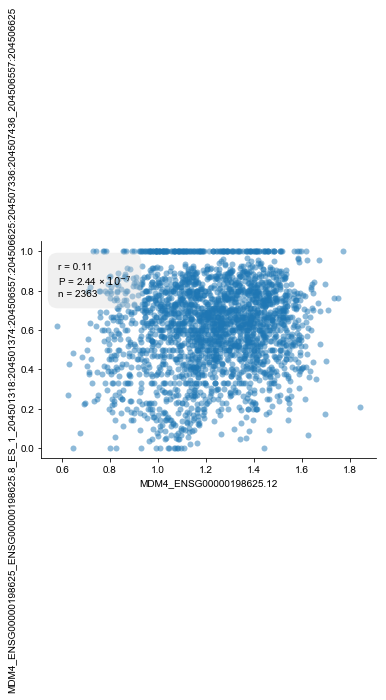

In [53]:
huy.regression(gtex_genex["MDM4_ENSG00000198625.12"],
               mdm4_6)



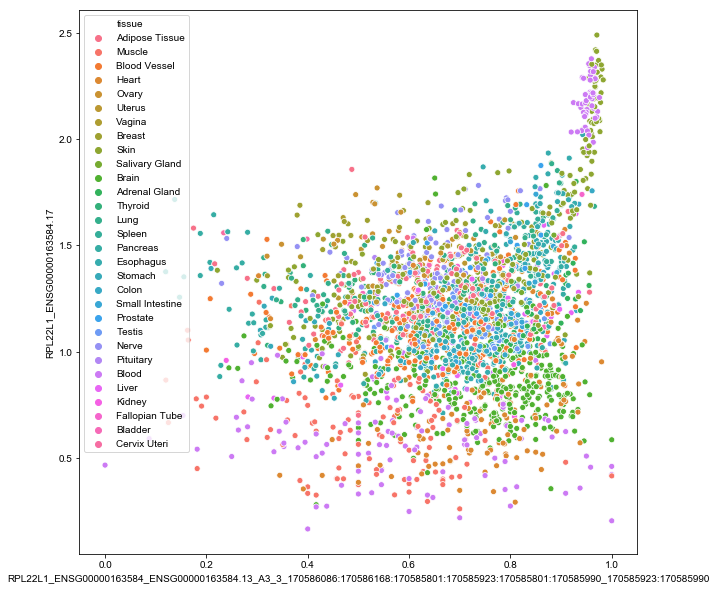

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(rpl22l1_3a,rpl22l1,hue=gtex_manifest["tissue"])

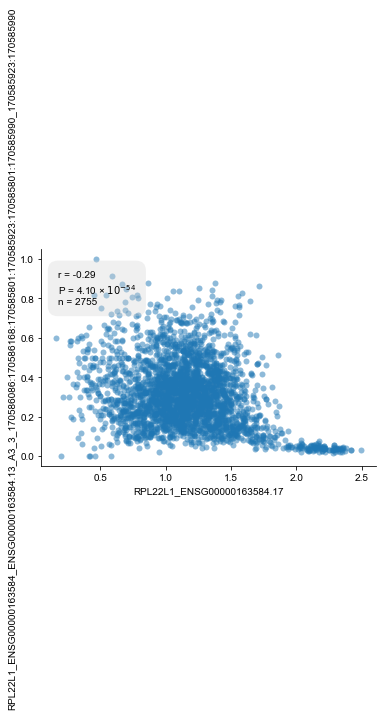

In [19]:
huy.regression(rpl22l1,1-rpl22l1_3a)